#PyTorch
Let's explore an end-to-end PyTorch workflow

In [3]:
#!pip install torch

In [4]:
import torch
from torch import nn #nn contains all of PyTorch's Building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

#1 Data (Preparing and Loading)

* Excel spreadsheet

* Images

* Videos

* Audio

* DNA

* Text

Using Linear Regression Formula : Y = a + bX

In [5]:
#Create *known* parameters

weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(Y)

(50, 50)

#Splitting data into test and training data

Let's create training and test sets for the given data

In [7]:
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

How better we visualize the data?

In [8]:
import matplotlib.pyplot as plt
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None) :

#Plots training data, test data and compare predictions
  plt.figure(figsize = (10, 7))

#Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label="Training data")
#Plot test data in green
  plt.scatter(test_data, test_labels, c = "g", s = 4, label="Testing data")

#Plot predictions if exists
  if predictions is not None :
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

#Show the legend
  plt.legend(prop = {"size" : 14});

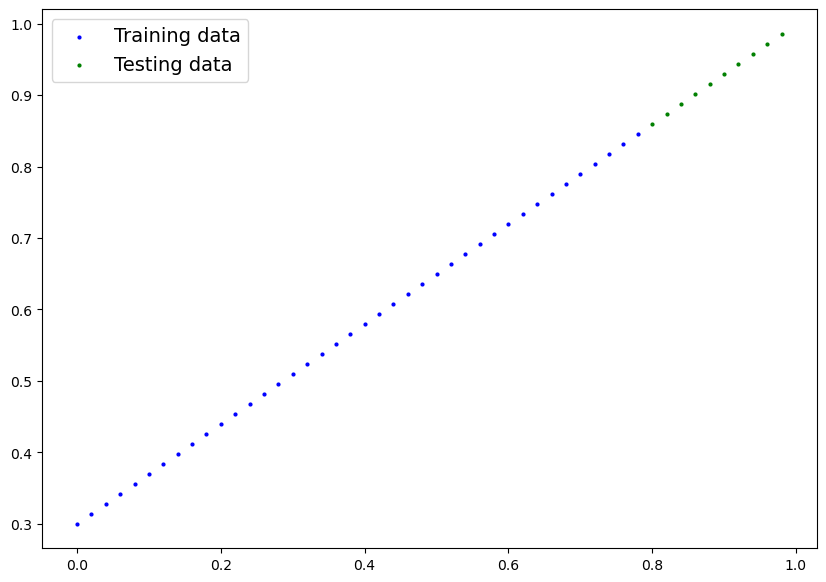

In [9]:
plot_predictions();

#Build our First model in Pytorch

What our model does

* Start with Random values(weight & bias)

* Look at training data and adjust the random values to better represent the ideal values

How?

1. Gradient descent
2. Backpropagation

In [10]:
#Create Linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module): #<-Almost everything in PyTorch inherits from nn
    def __init__(self) :
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,
                                              requires_grad = True,
                                              dtype = torch.float))
      self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype = torch.float))
      #Forward method to define computation in the model -> must be overrided with nn.module
    def forward(self, x : torch.Tensor) -> torch.Tensor :# <- "x" is the input data
      return self.weights * x + self.bias #Linear Regression

#Pytorch model building essentials

* torch.nn - contains all of the building blocks for neural networks (or) computational graphs

* torch.nn.Parameter - what parameters should our model try and learn

* torch.nn.module - base for all neural network modules

* torch.optim - Where optimizers live, help in gradient descent

* def forward() - All nn.module subclasses require you to overridee forward(), this method defines the computation

###Checking contents of our PyTorch Model

Let's see what's inside the model

So we can check the parameters using
.parameters()

In [11]:
#Create a Random Seed
torch.manual_seed(42)

#Create an instance of the model(this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

#Check out the paramters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [12]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [13]:
weight, bias

(0.7, 0.3)

###Making Predictions using torch.inference_mode()

To check our models predictive power, let's see how well it predicts Y_test based on X_text

When we pass data through our model, it's going to run it with forward()

In [14]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [15]:
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [16]:
#Make Predictions with model

with torch.inference_mode() : #Turns off gradient tracking -> For faster prediction
  y_preds = model_0(X_test)

#Can also be done this way , however inference_mode() is preferred
with torch.no_grad() :
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

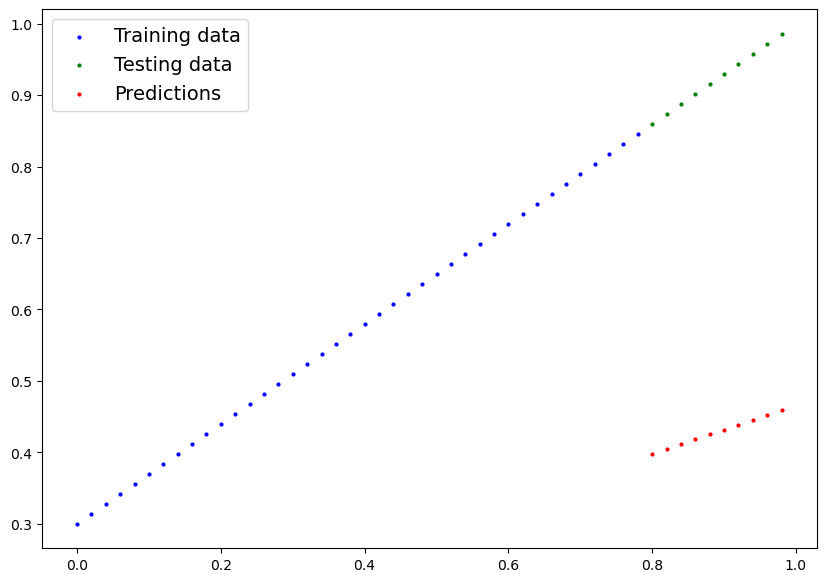

In [17]:
plot_predictions(predictions = y_preds)

## Train model

Idea is for a model to move from *unknown* parameters to *known* parameters

Loss function - to measure how poor your model's predictions are

aka Cost Function or Criterion

Things we need to train :

1. Loss Function
2. Takes into account the loss of a model and adjusts the parameters

PyTorch needs
* training loop
* testing loop

In [18]:
#Check out our model's parameters (a parameter is a value a model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
#Setup a loss function
loss_fn = nn.L1Loss()
loss_fn

#Setup an Optimizer(Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) #learning rate = possibly the most imp. hyperparameter
                                        # learning rate affects the changes


####Building a Training loop in PyTorch

Things we need:
0. Loop through the data and do
1. forward pass (this involves data moving through our model's forward() functions) - to make predictions on data
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(**backpropagation**)
5. Optimizer step - Use optimizer to adjust our model's parameter's to try and improve the loss(**gradient descent**)


In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [21]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [22]:
with torch.inference_mode() :
  list(model_0.parameters())

In [23]:
torch.manual_seed(42)

epochs = 200 #An epoch is one loop through data

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

###Training
#0. Loop through the data
for epoch in range(epochs) :
  #Set the model to training mode
  model_0.train() #train mode in PyTorch sets all parameters to require gradient

  #1. Forward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss

  loss = loss_fn(y_pred, Y_train)
  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to model parameters
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step()

  #Testing
  model_0.eval() #turns off different setting in model not needed for testing(dropout /batch norm)
  with torch.inference_mode() : #turns off gradient tracking & a couple more
    #torch.no_grad is the older version

    #1. Forward Pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, Y_test)
  #Prints what's happening
  if(epoch % 10 == 0) :
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss: {test_loss}")
  #Print our model state dict()
    print(f"Model : {model_0.state_dict()}")

Epoch : 0 | Loss : 0.31288138031959534 | Test Loss: 0.48106518387794495
Model : OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Loss : 0.1976713240146637 | Test Loss: 0.3463551998138428
Model : OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Loss : 0.08908725529909134 | Test Loss: 0.21729660034179688
Model : OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 | Loss : 0.053148526698350906 | Test Loss: 0.14464017748832703
Model : OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 | Loss : 0.04543796554207802 | Test Loss: 0.11360953003168106
Model : OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 | Loss : 0.04167863354086876 | Test Loss: 0.09919948130846024
Model : OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 | Loss : 0.03818932920694351 | Test Loss: 0.08886633068323135
Model

In [24]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [25]:
(weight, bias)

(0.7, 0.3)

In [26]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()), np.array(torch.tensor(test_loss_values).numpy())

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 array([0.48106518, 0.3463552 , 0.2172966 , 0.14464018, 0.11360953,
        0.09919948, 0.08886633, 0.08059376, 0.07232123, 0.06473556,
        0.05646304, 0.0481905 , 0.04060482, 0.03233228, 0.02405975,
        0.01647409, 0.00820156, 0.00502309, 0.00502309, 0.00502309],
       dtype=float32))

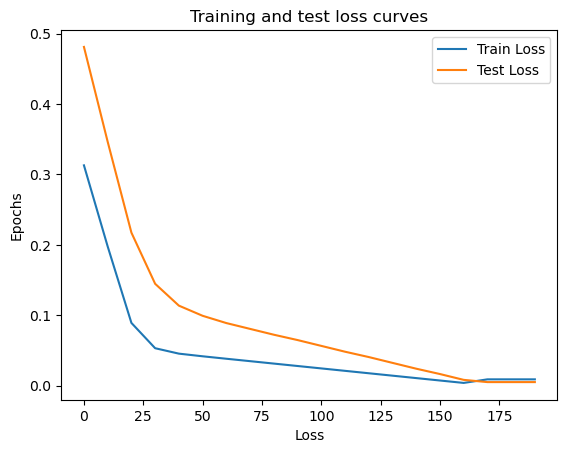

In [27]:
#Plot Loss values
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss curves")
plt.xlabel("Loss")
plt.ylabel("Epochs")
plt.legend()

In [28]:
with torch.inference_mode() :
  y_preds_new = model_0(X_test)

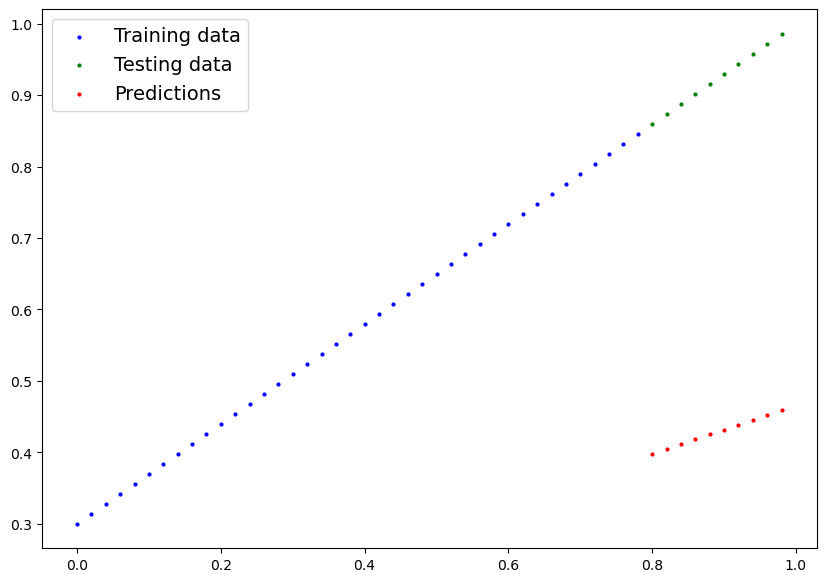

In [29]:
plot_predictions(predictions = y_preds)

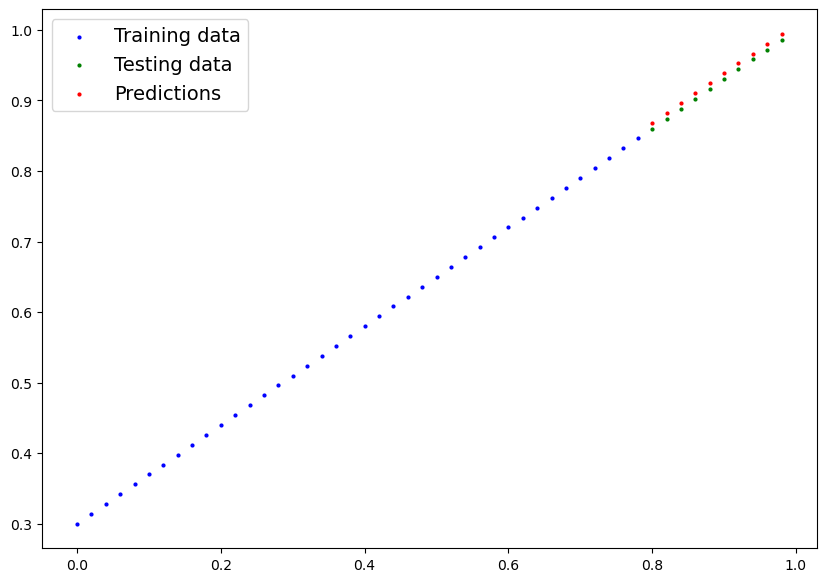

In [30]:
plot_predictions(predictions = y_preds_new)

*italicized text*###Saving a Model in PyTorch

There are three main methods to know for saving and loading models
1. torch.save() - to save PyTorch object in Python's pickle format
2. torch.load() - to load a saved PyTorch Object
3. torch.nn.Module.load_state_dict() - to load a model's saved state_dict

In [31]:
#Saving our PyTorch model

from pathlib import Path

#1. Create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save model's state_dict()
print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving Model to : models/01_pytorch_workflow_model_0.pth


In [32]:
!ls -l models

total 8
-rw-r--r--@ 1 anand  staff  1207 Aug 21 18:42 01_pytorch_workflow_model_0.pth


###Loading a PyTorch Model

Since we saved the state_dict() we create a new instance of the model and put state_dict into that


In [33]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [34]:
#To load in a saved_dict(), we've to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#Load the saved state_dict() of model_0(load with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [35]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [36]:
#Make some predictions with loaded model

loaded_model_0.eval()
with torch.inference_mode() :
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds


tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [37]:
#Compare loaded model preds with original model threads
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [38]:
model_0.eval()
with torch.inference_mode() :
  y_preds = model_0(X_test)

In [39]:
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [40]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])